# 전이 학습(Transfer Learning) 실습

##### P59 ~ P64 --------------------------------------------------

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os , os.path, shutil

In [3]:
import matplotlib.image as mpimg

### 데이터 다운로드

In [4]:
!curl -L https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip -o ./cats_and_dogs_filtered.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 65.4M  100 65.4M    0     0   113M      0 --:--:-- --:--:-- --:--:--  113M


In [5]:
!unzip -q cats_and_dogs_filtered.zip

###  폴더이름을 변수화

In [6]:
!apt-get install tree
!tree -d .

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  tree
0 upgraded, 1 newly installed, 0 to remove and 15 not upgraded.
Need to get 47.9 kB of archives.
After this operation, 116 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 tree amd64 2.0.2-1 [47.9 kB]
Fetched 47.9 kB in 1s (86.2 kB/s)
Selecting previously unselected package tree.
(Reading database ... 120882 files and directories currently installed.)
Preparing to unpack .../tree_2.0.2-1_amd64.deb ...
Unpacking tree (2.0.2-1) ...
Setting up tree (2.0.2-1) ...
Processing triggers for man-db (2.10.2-1) ...
.
├── cats_and_dogs_filtered
│   ├── train
│   │   ├── cats
│   │   └── dogs
│   └── validation
│       ├── cats
│       └── dogs
├── drive
│   ├── MyDrive
│   │   ├── 2023년세종교육
│   │   │   └── data
│   │   ├── Colab Notebooks
│   │   ├── etc
│   │   ├── kmk22
│   │   │   ├── Da

In [7]:
base_dir = './cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

### 데이터 파일의 명칭 확인

In [8]:
train_cat_fnames = os.listdir(train_cats_dir)
print(train_cat_fnames[:10])

train_dog_fnames = os.listdir(train_dogs_dir)
train_dog_fnames.sort()
print(train_dog_fnames[:10])

['cat.162.jpg', 'cat.866.jpg', 'cat.66.jpg', 'cat.804.jpg', 'cat.507.jpg', 'cat.383.jpg', 'cat.971.jpg', 'cat.530.jpg', 'cat.389.jpg', 'cat.404.jpg']
['dog.0.jpg', 'dog.1.jpg', 'dog.10.jpg', 'dog.100.jpg', 'dog.101.jpg', 'dog.102.jpg', 'dog.103.jpg', 'dog.104.jpg', 'dog.105.jpg', 'dog.106.jpg']


In [9]:
print('total training cat images : ', len(os.listdir(train_cats_dir)))
print('total trinaing dog images : ', len(os.listdir(train_dogs_dir)))
print('total validation cat images : ', len(os.listdir(validation_cats_dir)))
print('total validation dog images : ', len(os.listdir(validation_dogs_dir)))

total training cat images :  1000
total trinaing dog images :  1000
total validation cat images :  500
total validation dog images :  500


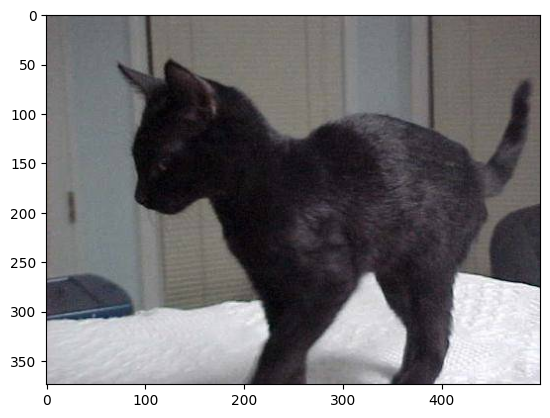

In [10]:
train_cat_fnames = os.listdir(train_cats_dir)
img_path = os.path.join(train_cats_dir, train_cat_fnames[9])
img = mpimg.imread(img_path)
plt.imshow(img)

### CNN 모델 구성

In [11]:
from keras import layers
from keras import models
from keras import optimizers
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator       #이미지를 변환해주는 함수
import numpy as np

In [12]:
img_width = 150
img_height = 150

##### P88 -----------------------------------------------------------

In [13]:
train_datagen = ImageDataGenerator(
    rescale = 1. /255 ,
    rotation_range = 40,
    width_shift_range = 0.2 ,
    height_shift_range = 0.2 ,
    shear_range = 0.2 ,
    zoom_range = 0.2 ,
    horizontal_flip = True
)

In [14]:
validation_datagen = ImageDataGenerator(rescale = 1. /255)

In [15]:
train_generator = train_datagen.flow_from_directory(directory=train_dir, target_size=(img_width, img_height),
                                                              classes=['dogs', 'cats'],
                                                              class_mode='binary',
                                                              batch_size=20)

Found 2000 images belonging to 2 classes.


In [16]:
validation_generator = validation_datagen.flow_from_directory(directory=validation_dir, target_size=(img_width, img_height),
                                                              classes=['dogs', 'cats'],
                                                              class_mode='binary',
                                                              batch_size=20)

Found 1000 images belonging to 2 classes.


### 모델 생성

In [17]:
model = models.Sequential()

In [18]:
model.add(layers.Conv2D(32, (3, 3), activation = 'relu', input_shape=(img_width, img_height, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = 'relu'))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))


In [19]:
model.compile(loss='binary_crossentropy', optimizer=optimizers.RMSprop(learning_rate=1e-4), metrics=['acc'])

In [20]:
history = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=100,  # 한 에포크당 몇번의 스텝을 거칠거냐?
    epochs=30,
    validation_data=validation_generator,validation_steps=50
)

<ipython-input-20-abcfec8b938f>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 31s 173ms/step - loss: 0.6928 - acc: 0.5125 - val_loss: 0.6869 - val_acc: 0.5900
Epoch 2/30
100/100 [==============================] - 18s 175ms/step - loss: 0.6889 - acc: 0.5465 - val_loss: 0.6764 - val_acc: 0.6100
Epoch 3/30
100/100 [==============================] - 19s 192ms/step - loss: 0.6832 - acc: 0.5600 - val_loss: 0.6724 - val_acc: 0.5530
Epoch 4/30
100/100 [==============================] - 17s 173ms/step - loss: 0.6782 - acc: 0.5750 - val_loss: 0.6617 - val_acc: 0.5800
Epoch 5/30
100/100 [==============================] - 17s 173ms/step - loss: 0.6700 - acc: 0.5945 - val_loss: 0.6493 - val_acc: 0.6190
Epoch 6/30
100/100 [==============================] - 17s 174ms/step - loss: 0.6636 - acc: 0.5925 - val_loss: 0.6465 - val_acc: 0.6100
Epoch 7/30
100/100 [==============================] - 17s 173ms/step - loss: 0.6638 - acc: 0.5895 - val_loss: 0.6523 - val_acc: 0.5950
Epoch 8/30
100/100 [==============================] - 1

Text(0.5, 1.0, 'Training and validation loss')

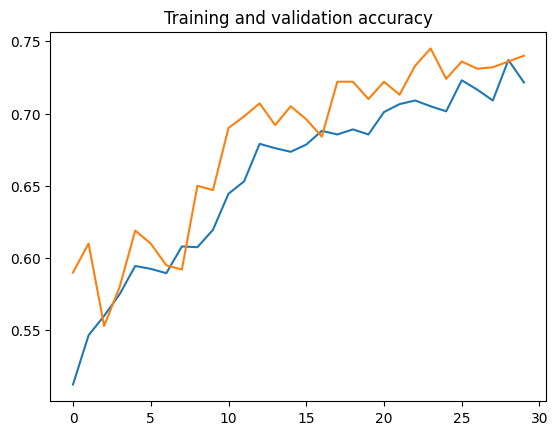

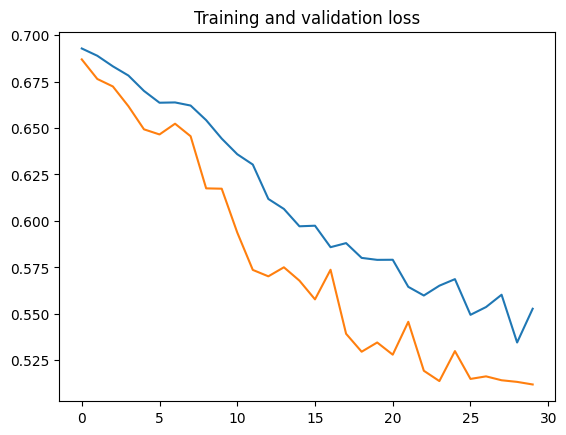

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc)
plt.plot(epochs, val_acc)
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss)
plt.plot(epochs, val_loss)
plt.title('Training and validation loss')

# **전이 학습(Transfer Learning)    P98**     

In [22]:
from keras.applications import VGG16

In [23]:
conv_base = VGG16(weights='imagenet',
                  include_top=False,                        # 분류기를 뜻함, 분류기는 새로 만들거기때문에 갖고올 필요 없음
                  input_shape=(150,150, 3))

58889256/58889256 [==============================] - 0s 0us/step


In [24]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [25]:
batch_size=20

datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
def extract_features(directory, sample_count):
  features = np.zeros(shape=(sample_count, 4, 4, 512))            #
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
      directory,
 	    target_size=(img_width,img_height),
      class_mode='binary',
			batch_size=batch_size)
  i=1
  for inputs_batch, labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch)
    features[i*batch_size:(i+1)*batch_size] = features_batch
    labels[i*batch_size:(i+1)*batch_size] = labels_batch
    i += 1
    if i* batch_size >= sample_count:
      break
  return features, labels

In [27]:
train_features, train_labels = extract_features(train_dir, 2000)
validation_features, validation_labels = extract_features(validation_dir, 1000)

Found 2000 images belonging to 2 classes.
1/1 [==============================] - 0s 19ms/step
Found 1000 images belonging to 2 classes.
1/1 [==============================] - 0s 28ms/step


In [28]:
train_features = np.reshape(train_features, (2000, 4*4*512))
validation_features = np.reshape(validation_features, (1000, 4*4*512))

In [29]:
model = models.Sequential()

model.add(layers.Dense(512, activation='relu', input_dim= 4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1, activation='sigmoid'))

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 512)               4194816   
                                                                 
 dropout_1 (Dropout)         (None, 512)               0         
                                                                 
 dense_3 (Dense)             (None, 1)                 513       
                                                                 
Total params: 4195329 (16.00 MB)
Trainable params: 4195329 (16.00 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [31]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])
history = model.fit(
    train_features, train_labels,
    epochs=30,
    validation_data= (validation_features, validation_labels),
    batch_size=batch_size)

Epoch 1/30
100/100 [==============================] - 1s 7ms/step - loss: 0.5588 - acc: 0.7095 - val_loss: 0.4027 - val_acc: 0.8490
Epoch 2/30
100/100 [==============================] - 1s 5ms/step - loss: 0.3946 - acc: 0.8265 - val_loss: 0.3382 - val_acc: 0.8740
Epoch 3/30
100/100 [==============================] - 0s 4ms/step - loss: 0.3269 - acc: 0.8650 - val_loss: 0.3173 - val_acc: 0.8810
Epoch 4/30
100/100 [==============================] - 1s 5ms/step - loss: 0.2904 - acc: 0.8885 - val_loss: 0.2974 - val_acc: 0.8820
Epoch 5/30
100/100 [==============================] - 0s 5ms/step - loss: 0.2632 - acc: 0.8970 - val_loss: 0.2913 - val_acc: 0.8820
Epoch 6/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2421 - acc: 0.9085 - val_loss: 0.2840 - val_acc: 0.8860
Epoch 7/30
100/100 [==============================] - 0s 4ms/step - loss: 0.2229 - acc: 0.9160 - val_loss: 0.2736 - val_acc: 0.8880
Epoch 8/30
100/100 [==============================] - 0s 5ms/step - loss: 0.

### 성능확인

Text(0.5, 1.0, 'Training(--) and validation loss')

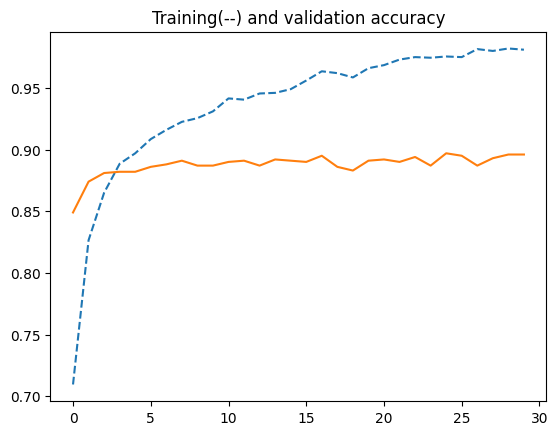

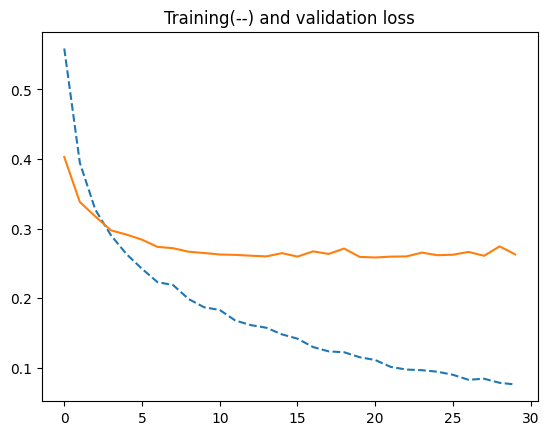

In [32]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.figure()
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

### 데이터 확장을 사용하는 방법 P107

In [35]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

In [36]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 4, 4, 512)         14714688  
                                                                 
 flatten_3 (Flatten)         (None, 8192)              0         
                                                                 
 dense_4 (Dense)             (None, 256)               2097408   
                                                                 
 dense_5 (Dense)             (None, 1)                 257       
                                                                 
Total params: 16812353 (64.13 MB)
Trainable params: 16812353 (64.13 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
# 학습을 동결하지 않으면 모두 재 학습된다!
conv_base.trainable = False


In [38]:
train_datagen = ImageDataGenerator(
  rescale= 1./255,
  rotation_range = 40,
  width_shift_range = 0.2,
  height_shift_range = 0.2,
  shear_range=0.2,
  zoom_range=0.2,
  horizontal_flip = True,
  fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale = 1./255)

train_generator = train_datagen.flow_from_directory(directory=train_dir,
											   target_size=(img_width,img_height),
											   class_mode='binary',
											   batch_size=20)

validation_generator = validation_datagen.flow_from_directory(directory=validation_dir,
											   target_size=(img_width,img_height),
											   class_mode='binary',
											   batch_size=20)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [40]:
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(learning_rate=2e-5),
              metrics=['acc'])


history = model.fit_generator(
    generator=train_generator,
    steps_per_epoch=100,
    epochs=30,
    validation_data=validation_generator,
    validation_steps=50)

<ipython-input-40-a97a81f1e697>:6: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(


Epoch 1/30
100/100 [==============================] - 21s 195ms/step - loss: 0.3634 - acc: 0.8410 - val_loss: 0.3031 - val_acc: 0.8690
Epoch 2/30
100/100 [==============================] - 20s 202ms/step - loss: 0.3446 - acc: 0.8455 - val_loss: 0.3024 - val_acc: 0.8680
Epoch 3/30
100/100 [==============================] - 20s 196ms/step - loss: 0.3568 - acc: 0.8375 - val_loss: 0.3011 - val_acc: 0.8700
Epoch 4/30
100/100 [==============================] - 23s 226ms/step - loss: 0.3469 - acc: 0.8435 - val_loss: 0.2987 - val_acc: 0.8710
Epoch 5/30
100/100 [==============================] - 20s 203ms/step - loss: 0.3448 - acc: 0.8455 - val_loss: 0.3016 - val_acc: 0.8720
Epoch 6/30
100/100 [==============================] - 20s 197ms/step - loss: 0.3448 - acc: 0.8520 - val_loss: 0.2957 - val_acc: 0.8700
Epoch 7/30
100/100 [==============================] - 19s 195ms/step - loss: 0.3418 - acc: 0.8535 - val_loss: 0.2949 - val_acc: 0.8730
Epoch 8/30
100/100 [==============================] - 2

Text(0.5, 1.0, 'Training(--) and validation loss')

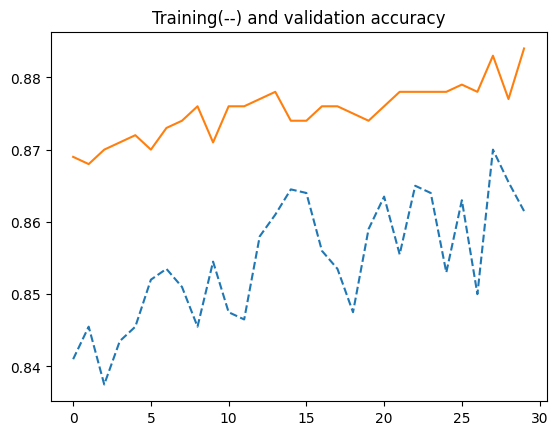

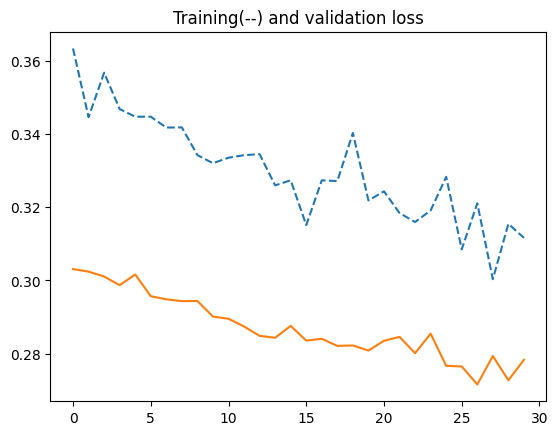

In [41]:
acc = history.history['acc']
val_acc = history.history['val_acc']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, '--')
plt.plot(epochs, val_acc)
plt.title('Training(--) and validation accuracy')

plt.figure()
plt.plot(epochs, loss,  '--')
plt.plot(epochs, val_loss)
plt.title('Training(--) and validation loss')

### 미세조정 방법에 대해서는 각자 집에서 해보는걸로....
 - gg_61_cats_and_dogs_transfer.ipynb 참조